In [635]:
from tabnanny import NannyNag

import pandas as pd
import os
import math

Definizione del percorso del dataframe

In [636]:
df_dir = os.path.join(os.getcwd(), 'Datasets')
df_path = (os.path.join(df_dir, 'nyc_weather.csv'))
df = pd.read_csv(df_path)


Stampa del df

In [637]:
display(df)

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,NaN,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,NaN,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,NaN,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,NaN,1.8,7,Rain,109


<Axes: >

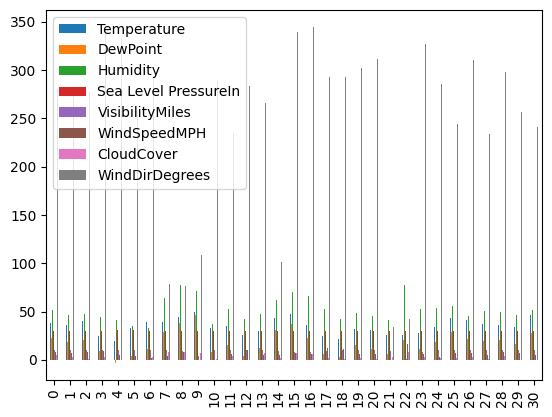

In [638]:
df.plot.bar()

Recupero della porzione di df contenente le temperature

In [639]:
temp_df = df['Temperature']
print(temp_df)

0     38
1     36
2     40
3     25
4     20
5     33
6     39
7     39
8     44
9     50
10    33
11    35
12    26
13    30
14    43
15    47
16    36
17    25
18    22
19    32
20    31
21    26
22    26
23    28
24    34
25    43
26    41
27    37
28    36
29    34
30    46
Name: Temperature, dtype: int64


Stampa della temperatura massima e minima

In [640]:
temp_max = temp_df.max()
temp_min = temp_df.min()
print(f"La temperatura massima è:  {temp_max} , mentre la minima è :  {temp_min}")

La temperatura massima è:  50 , mentre la minima è :  20


Date in cui ha piovuto

In [641]:
rain_dates = df['EST'][df['Events'] == 'Rain']
print(rain_dates)

8      1/9/2016
9     1/10/2016
15    1/16/2016
26    1/27/2016
Name: EST, dtype: object


Date in cui l'umidità è stata maggiore di 60, associando anche la colonna dell'umidità
Occhio che per selezionare entrambe le colonne la sintassi corretta è df[['EST', 'Humidity']]
e non df['EST', 'Humidity']
il secondo caso si aspetta una tupla come chiave e non ha senso per pandas


In [642]:
hum_dates = df[['EST', 'Humidity']][df['Humidity'] > 60]
print(hum_dates)

          EST  Humidity
7    1/8/2016        64
8    1/9/2016        77
9   1/10/2016        71
14  1/15/2016        62
15  1/16/2016        70
16  1/17/2016        66
22  1/23/2016        78


Alternativa 1 (loc)

In [643]:
filtro = df['Humidity'] > 60
print(df.loc[filtro, ['EST', 'Humidity']])

          EST  Humidity
7    1/8/2016        64
8    1/9/2016        77
9   1/10/2016        71
14  1/15/2016        62
15  1/16/2016        70
16  1/17/2016        66
22  1/23/2016        78


Alternativa 2

[df['Humidity'] > 60] restituisce il dataframe originale filtrato per questa condizione
[['EST', 'Humidity']] prende solo le colonne selezionate


In [644]:
hum_dates = df[df['Humidity'] > 60][['EST', 'Humidity']]
print(hum_dates)

          EST  Humidity
7    1/8/2016        64
8    1/9/2016        77
9   1/10/2016        71
14  1/15/2016        62
15  1/16/2016        70
16  1/17/2016        66
22  1/23/2016        78


Per restituire la media di una colonna

In [645]:
mean_wind = df['WindSpeedMPH'].mean()
print(mean_wind)

6.892857142857143


Per pulire il dataframe, il metodo fillna rimpiazza i valori NaN e NA con il valore passato come argomento. "inplace" fa in modo che la modifica avvenga sul df originale

In [646]:
df.fillna(0, inplace=True)
display(df)

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,0,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,0,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,0,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,0.0,1.8,7,Rain,109


Valore dopo il fillna (ora ha conteggiato gli zeri)

In [647]:
mean_wind = df['WindSpeedMPH'].mean()
print(mean_wind)

6.225806451612903


Grandezza del df

In [648]:
print(df.shape)

(31, 11)


hey, è una tupla, quindi posso fare...

In [649]:
rows, columns = df.shape
print(rows)

31


La testa ( di default i primi 5 record del df )

In [650]:
df.head()

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333


In [651]:
df.head(2)

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275


Analogamente..

In [652]:
df.tail(1)

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
30,1/31/2016,46,28,52,29.9,10,5.0,0,0,0,241


Se voglio stampare una porzione del df. La prima porzione è inclusa, la seconda no.

In [653]:
display(df[2:5])

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333


Lista delle colonne

In [654]:
df.columns

Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')

Contenuto di una colonna (è analogo a df['EST'])

In [655]:
df.EST

0      1/1/2016
1      1/2/2016
2      1/3/2016
3      1/4/2016
4      1/5/2016
5      1/6/2016
6      1/7/2016
7      1/8/2016
8      1/9/2016
9     1/10/2016
10    1/11/2016
11    1/12/2016
12    1/13/2016
13    1/14/2016
14    1/15/2016
15    1/16/2016
16    1/17/2016
17    1/18/2016
18    1/19/2016
19    1/20/2016
20    1/21/2016
21    1/22/2016
22    1/23/2016
23    1/24/2016
24    1/25/2016
25    1/26/2016
26    1/27/2016
27    1/28/2016
28    1/29/2016
29    1/30/2016
30    1/31/2016
Name: EST, dtype: object

e qual è il suo tipo?

In [656]:
type(df.EST)

pandas.core.series.Series

Come accennato in precedenza, per accedere a delle colonne specifiche del df

In [657]:
df[['EST', 'DewPoint']]

,EST,DewPoint
0,1/1/2016,23
1,1/2/2016,18
2,1/3/2016,21
3,1/4/2016,9
4,1/5/2016,-3
5,1/6/2016,4
6,1/7/2016,11
7,1/8/2016,29
8,1/9/2016,38
9,1/10/2016,46


deviazione standard

In [658]:
std = df['Temperature'].std()
print(std)

7.639315400279416


describe fa un display delle statistiche del df laddove vi siano colonne numeriche

In [659]:
df.describe()

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,34.677419,17.838710,51.677419,29.992903,9.193548,6.225806,3.129032,247.129032
std,7.639315,11.378626,11.634395,0.237237,1.939405,3.422569,2.629853,92.308086
min,20.000000,-3.000000,33.000000,29.520000,1.000000,0.000000,0.000000,34.000000
25%,29.000000,10.000000,44.500000,29.855000,9.000000,5.000000,1.000000,238.000000
50%,35.000000,18.000000,50.000000,30.010000,10.000000,6.000000,3.000000,281.000000
75%,39.500000,23.000000,55.000000,30.140000,10.000000,8.000000,4.500000,300.000000
max,50.000000,46.000000,78.000000,30.570000,10.000000,16.000000,8.000000,345.000000


applicare una condizione di filtro al df

In [660]:
df[df.Temperature>=32]

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,0,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,0,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,0,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,0.0,1.8,7,Rain,109
10,1/11/2016,33,8,37,29.92,10,0.0,0,1,0,289
11,1/12/2016,35,15,53,29.85,10,6.0,T,4,0,235


In [661]:
df[df.Temperature == df.Temperature.max()]

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
9,1/10/2016,50,46,71,29.59,4,0.0,1.8,7,Rain,109


Se voglio un df ristretto a certe colonne

In [662]:
df[['EST', 'Temperature']][df.Temperature == df.Temperature.max()]

,EST,Temperature
9,1/10/2016,50


Gli indici

In [663]:
df.index
print(df.index.name)


None


se voglio cambiarlo (dal momento che quello attuale è creato di default)

In [664]:
df.set_index('EST', inplace = True)

In [665]:
df

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
EST,,,,,,,,,,
1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333
1/6/2016,33,4,35,30.50,10,4.0,0,0,0,259
1/7/2016,39,11,33,30.28,10,2.0,0,3,0,293
1/8/2016,39,29,64,30.20,10,4.0,0,8,0,79
1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76


Per accedere tramite index, posso usare loc

In [666]:
df.loc['1/9/2016']

Temperature                44
DewPoint                   38
Humidity                   77
Sea Level PressureIn    30.16
VisibilityMiles             9
WindSpeedMPH              8.0
PrecipitationIn             T
CloudCover                  8
Events                   Rain
WindDirDegrees             76
Name: 1/9/2016, dtype: object

Per resettare gli indici

In [667]:
df.reset_index(inplace=True)

In [668]:
df

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,0,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,0,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,0,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,0.0,1.8,7,Rain,109


Altro dataframe: il parametro header definisce da quale riga voglio partire per creare il df
name sostituisce i nomi della riga dell'header con quelli specificati
nrows specifica quante righe vuoi ottenere

In [669]:
df2_path = os.path.join(df_dir, 'stock_data.csv')
df2 = pd.read_csv(df2_path, header = 0, names = ["Tickers", "Eps", "Revenue", "Price", "People"], nrows = 5)
df2

,Tickers,Eps,Revenue,Price,People
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Ci sono dei dati sporchi come si può vedere, che rappresentano dei NaN, se voglio toglierli posso specificare i n.a values

In [670]:
df2 = pd.read_csv(df2_path, header = 0, names = ["Tickers", "Eps", "Revenue", "Price", "People"], nrows = 5, na_values = ["not available", "n.a.", -1])
df2

,Tickers,Eps,Revenue,Price,People
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,NaN,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


Posso anche passarli come json i na_values (per esempio -1 potrebbe essere un valore corretto per una determinata colonna

In [671]:
df2 = pd.read_csv(df2_path, header = 0, names = ["Tickers", "Eps", "Revenue", "Price", "People"], nrows = 5, na_values =
{
    'Eps' : ["not available", "n.a."],
    'Revenue' : ["not available", "n.a.", -1],
    'Price' : ["not available", "n.a.", -1],
    'People' : ["not available", "n.a.", -1]
})
df2

,Tickers,Eps,Revenue,Price,People
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


Se volessi scrivere un csv a partire da un df (posso anche specificare le colonne da scegliere)

In [672]:
out_path = os.path.join(os.getcwd(), "Outputs")
new_csv_path = os.path.join(out_path, 'new.csv')
df2.to_csv(new_csv_path, columns = ['Tickers', 'Eps'])

Posso fare anche delle simpatiche operazioni di conversione scrivendo io delle funzioni apposite

In [673]:
def convertitore_nome(cella):
    if pd.isna(cella) or cella=="n.a.":
        return "Pippo"
    return cella

In [674]:
df2 = pd.read_csv(df2_path, header = 0, names = ["Tickers", "Eps", "Revenue", "Price", "People"], nrows = 5, na_values =
{
    'Eps' : ["not available", "n.a."],
    'Revenue' : ["not available", "n.a.", -1],
    'Price' : ["not available", "n.a.", -1],
    'People' : ["not available", "n.a.", -1]
}, converters = {
    'People' : convertitore_nome
})
df2

,Tickers,Eps,Revenue,Price,People
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,Pippo
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


Se voglio scriverlo come excel

In [675]:
df_temp_data = df.copy()



In [676]:
df_temp_data

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,0,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,0,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,0,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,0,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,0,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,0,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,0,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,0,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,0.0,1.8,7,Rain,109


In [677]:
import plotly.express as px

fig = px.density_heatmap(
    df_temp_data,
    x="EST",
    y="Events",
    z="Temperature",
    labels={"EST": "Data", "Events": "Eventi", "Temperature": "Temperatura"},
    
)


fig2 = px.scatter(df_temp_data,
                  x="EST",
                  y="Humidity",
                  size="Temperature", 
                  color="Events",
                    hover_name="Events", log_x=True, size_max=60)



fig2.show()      